# Exploring Kinoeva Data

Reference: https://python-graph-gallery.com/

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# style
sns.set()

from utils import read_kinoeva
%matplotlib inline

In [9]:
df = read_kinoeva('data/2/CFF Demo_ Underhand Vertical Med Ball Throw.txt')
df.head()

,X,Y,Original_timestamp
T,,,
00:00:00,0.0,0.0,0:00:00:00
00:00:00.030000,1.0,9.0,0:00:00:03
00:00:00.060000,2.0,20.0,0:00:00:06
00:00:00.100000,3.0,34.0,0:00:00:10
00:00:00.130000,5.0,48.0,0:00:00:13


In [10]:
# We can do two time series plots
# Adapting this example: https://python-graph-gallery.com/122-multiple-lines-chart/

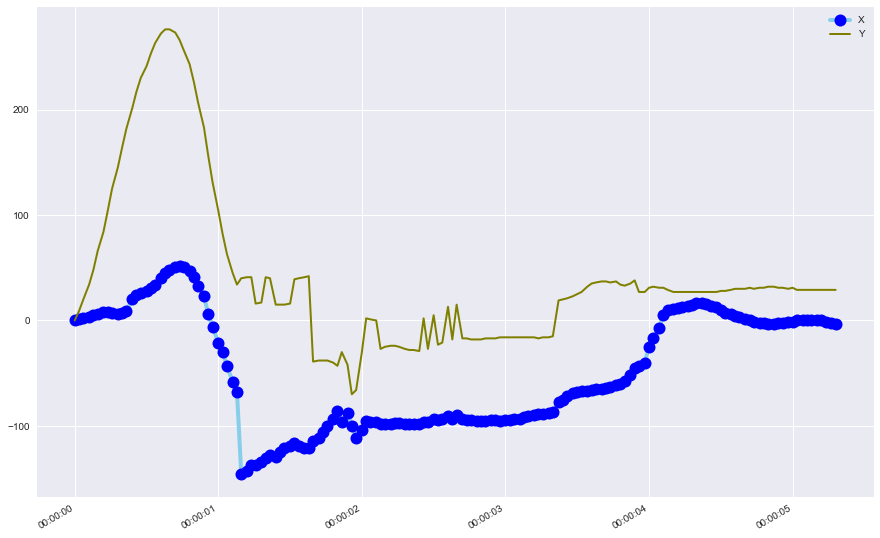

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))

# easier to view as timestamps
timestamps = pd.to_datetime(df.index.values)

# only show hh::mm::ss
ax.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))

# plot both series
ax.plot(timestamps, df.X, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
ax.plot(timestamps, df.Y, marker='', color='olive', linewidth=2)

ax.legend()

# nicer looking dates
fig.autofmt_xdate()
plt.show()

# Multiple Trajectories

The example above shows a single trajectory (ball).  

Next, let's explore multiple trajectories, with the final goal of modeling relationships between them.
- Throw 1: ball and hips trajectories
- Throw 2: ball and hips trajectories

Notes:
- Kinovea saves all trajectories to 1 big text file. The multiple text files are then created by manually splitting into separate files.
- The trajectories are tracked in a way that aligns the timestamps.

In [20]:
df_ball1 = read_kinoeva('data/3/CFF Demo_ Underhand Vertical Med Ball Throw1_Ball.txt')
df_ball1.head()

,X,Y,Original_timestamp
T,,,
00:00:00,155.0,42.0,0:00:00:00
00:00:00.030000,155.0,47.0,0:00:00:03
00:00:00.060000,156.0,53.0,0:00:00:06
00:00:00.100000,157.0,62.0,0:00:00:10
00:00:00.130000,158.0,74.0,0:00:00:13


In [21]:
df_hips1 = read_kinoeva('data/3/CFF Demo_ Underhand Vertical Med Ball Throw1_Hips.txt')
df_hips1.head()

,X,Y,Original_timestamp
T,,,
00:00:00,-25.0,199.0,0:00:00:00
00:00:00.030000,-25.0,201.0,0:00:00:03
00:00:00.060000,-25.0,204.0,0:00:00:06
00:00:00.100000,-24.0,207.0,0:00:00:10
00:00:00.130000,-24.0,211.0,0:00:00:13


In [22]:
df_ball2 = read_kinoeva('data/3/CFF Demo_ Underhand Vertical Med Ball Throw2_Ball.txt')
df_ball2.head()

,X,Y,Original_timestamp
T,,,
00:00:00,255.0,96.0,0:00:00:00
00:00:00.030000,258.0,104.0,0:00:00:03
00:00:00.060000,261.0,116.0,0:00:00:06
00:00:00.100000,266.0,129.0,0:00:00:10
00:00:00.130000,271.0,140.0,0:00:00:13


In [23]:
df_hips2 = read_kinoeva('data/3/CFF Demo_ Underhand Vertical Med Ball Throw2_Hips.txt')
df_hips2.head()

,X,Y,Original_timestamp
T,,,
00:00:00,116.0,263.0,0:00:00:00
00:00:00.030000,115.0,265.0,0:00:00:03
00:00:00.060000,115.0,267.0,0:00:00:06
00:00:00.100000,115.0,269.0,0:00:00:10
00:00:00.130000,116.0,271.0,0:00:00:13


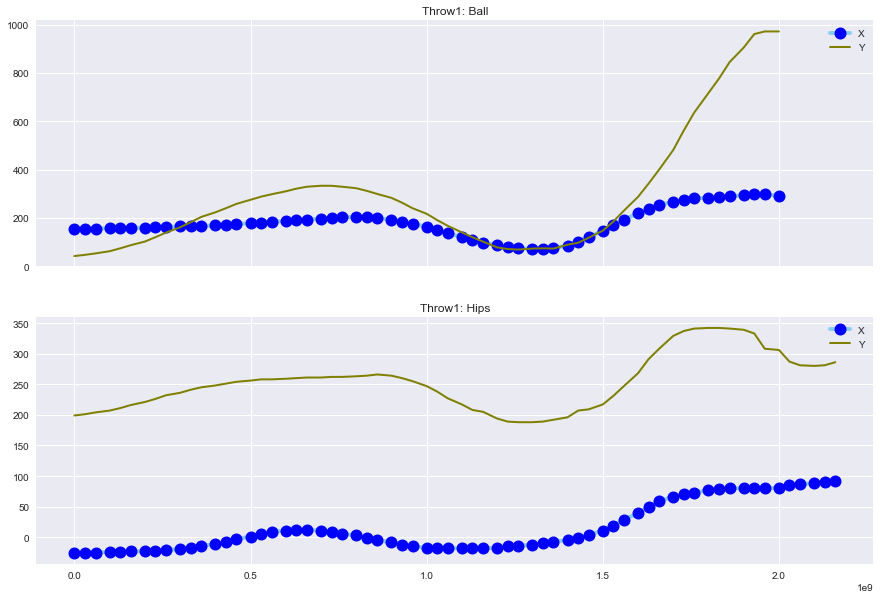

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# plot
axs[0].set_title('Throw1: Ball')
axs[0].plot(df_ball1.X, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
axs[0].plot(df_ball1.Y, marker='', color='olive', linewidth=2)
axs[0].legend()

axs[1].set_title('Throw1: Hips')
axs[1].plot(df_hips1.X, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
axs[1].plot(df_hips1.Y, marker='', color='olive', linewidth=2)
axs[1].legend()

plt.show()

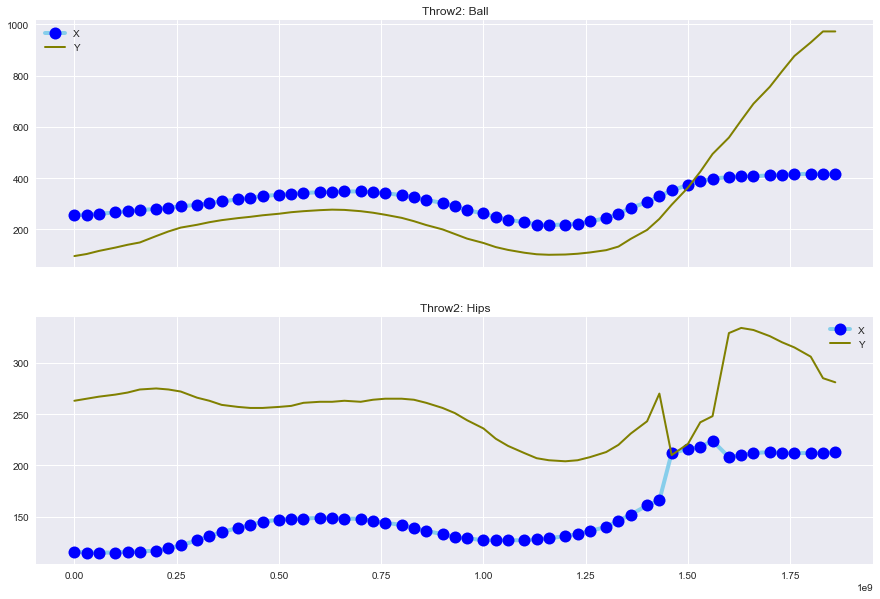

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# plot
axs[0].set_title('Throw2: Ball')
axs[0].plot(df_ball2.X, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
axs[0].plot(df_ball2.Y, marker='', color='olive', linewidth=2)
axs[0].legend()

axs[1].set_title('Throw2: Hips')
axs[1].plot(df_hips2.X, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
axs[1].plot(df_hips2.Y, marker='', color='olive', linewidth=2)
axs[1].legend()

plt.show()

# Velocity and Acceleration

References:
- https://dsp.stackexchange.com/questions/9498/have-position-want-to-calculate-velocity-and-acceleration
- https://stackoverflow.com/questions/16841729/how-do-i-compute-the-derivative-of-an-array-in-python

In [82]:
from numpy import diff

def velocity_and_acceleration(df:pd.DataFrame):
    """
    Args:
        df: Dataframe with the following information
            index: timedelta
            X: x-coordinate
            Y: y-coordinate
    Returns:
        Dictionary with the following keys and values:
            vx: x-velocity
            vy: y-velocity
            ax: x-acceleration
            ay: y-acceleration
    """
    t = df.index.values / np.timedelta64(1, 's')
    x = df.X.values
    y = df.Y.values

    dt = diff(t.astype('float'))
    dx = diff(x)
    vx = dx/dt

    dy = diff(y)
    vy = dy/dt
    
    ax = diff(vx)/dt[1:]
    ay = diff(vy)/dt[1:]
    
    return {'vx': vx, 'vy': vy, 'ax': ax, 'ay': ay}

In [97]:
va_ball1 = velocity_and_acceleration(df_ball1)
va_hips1 = velocity_and_acceleration(df_hips1)

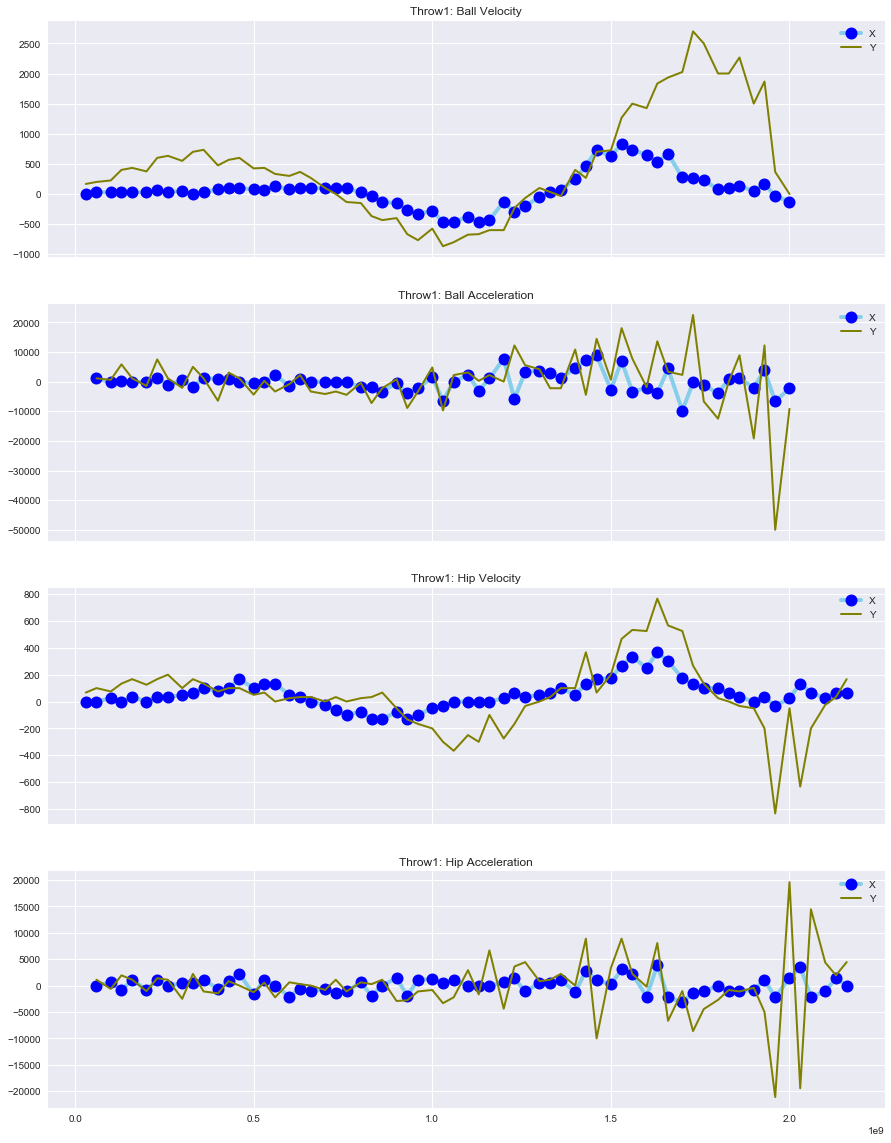

In [104]:
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# velocity is first order difference (df_ball1.index[1:])
axs[0].set_title('Throw1: Ball Velocity')
axs[0].plot(df_ball1.index[1:], va_ball1['vx'], label='X', marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
axs[0].plot(df_ball1.index[1:], va_ball1['vy'], label='Y', marker='', color='olive', linewidth=2)
axs[0].legend()

# acceleration is second order difference (df_ball1.index[2:])
axs[1].set_title('Throw1: Ball Acceleration')
axs[1].plot(df_ball1.index[2:], va_ball1['ax'], label='X', marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
axs[1].plot(df_ball1.index[2:], va_ball1['ay'], label='Y', marker='', color='olive', linewidth=2)
axs[1].legend()

axs[2].set_title('Throw1: Hip Velocity')
axs[2].plot(df_hips1.index[1:], va_hips1['vx'], label='X', marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
axs[2].plot(df_hips1.index[1:], va_hips1['vy'], label='Y', marker='', color='olive', linewidth=2)
axs[2].legend()

axs[3].set_title('Throw1: Hip Acceleration')
axs[3].plot(df_hips1.index[2:], va_hips1['ax'], label='X', marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
axs[3].plot(df_hips1.index[2:], va_hips1['ay'], label='Y', marker='', color='olive', linewidth=2)
axs[3].legend()

plt.show()